In [46]:
import pip
# pip.main(['install', ''])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data normalization and standardization 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from fancyimpute import KNN

#Training and testing split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
#from sklearn.ensemble.forest import RandomForestClassifier
from sklearn import svm
import xgboost as xg 

#Evalution
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

## Loading Training/Testing Data:

In [2]:
train_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/train.csv'
test_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/test.csv'

train_df = pd.read_csv(train_url, low_memory=False, error_bad_lines=False, index_col='Id')
test_df = pd.read_csv(test_url, low_memory=False, error_bad_lines=False, index_col='Id')

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing:

In [3]:
# create df that consists of columns and the number of missing values for each 
data = train_df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

# add column and fill it with the percentage of those missing values
missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/train_df.shape[0] * 100)) 
missing_df = missing_df[missing_df.missing_cnt > 0]
missing_df

,missing_cnt,percent_missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [1405]:
# drop the columns where majority of their values are missing
# train_df = train_df.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'], axis = 1)
# train_df.head()

In [4]:
# creating a generic dictionary to hold numercial values to represent categorical values
# for quality related columns (ExterQual, BsmtQual)
quality_ratings = {
 'NA':0,
 '0':0,
 'Po':0.2, 
 'Fa':0.4, 
 'TA':0.6, 
 'Gd':0.8, 
 'Ex':1
}

In [5]:
# Converting category labels to numerical values for ExterQual column
train_df['ExterQual'] = train_df.ExterQual.map(quality_ratings)
test_df['ExterQual'] = test_df.ExterQual.map(quality_ratings)

# Converting category labels to numerical values for ExterCond column
train_df['ExterCond'] = train_df.ExterCond.map(quality_ratings)
test_df['ExterCond'] = test_df.ExterCond.map(quality_ratings)

In [6]:
# Converting category labels to numerical values for BsmtQual column
train_df['BsmtQual'] = train_df.BsmtQual.map(quality_ratings)
test_df['BsmtQual'] = train_df.BsmtQual.map(quality_ratings)

# Converting category labels to numerical values for BsmtCond column
train_df['BsmtCond'] = train_df.BsmtCond.map(quality_ratings)
test_df['BsmtCond'] = train_df.BsmtCond.map(quality_ratings)

In [7]:
# Converting category labels to numerical values for HeatingQC column
train_df['HeatingQC'] = train_df.HeatingQC.map(quality_ratings)
test_df['HeatingQC'] = train_df.HeatingQC.map(quality_ratings)

In [8]:
# Converting category labels to numerical values for FireplaceQu column
train_df['FireplaceQu'] = train_df.FireplaceQu.map(quality_ratings)
test_df['FireplaceQu'] = train_df.FireplaceQu.map(quality_ratings)

In [9]:
# Converting category labels to numerical values for KitchenQual column
train_df['KitchenQual'] = train_df.KitchenQual.map(quality_ratings)
test_df['KitchenQual'] = train_df.KitchenQual.map(quality_ratings)

In [10]:
# Converting category labels to numerical values for GarageQual column
train_df['GarageQual'] = train_df.GarageQual.map(quality_ratings)
test_df['GarageQual'] = train_df.GarageQual.map(quality_ratings)

# Converting category labels to numerical values for GarageCond column
train_df['GarageCond'] = train_df.GarageCond.map(quality_ratings)
test_df['GarageCond'] = train_df.GarageCond.map(quality_ratings)

In [11]:
# Converting category labels to numerical values for PoolQC column
train_df['PoolQC'] = train_df.PoolQC.map(quality_ratings)
test_df['PoolQC'] = train_df.PoolQC.map(quality_ratings)

In [12]:
train_df['CentralAir'] = train_df.CentralAir.map(
{'Y': 1,
 'N': 0})
train_df['PavedDrive'] = train_df.PavedDrive.map(
{'Y': 1,
 'N': 0.5,
 'P': 0})
train_df.head()

test_df['CentralAir'] = train_df.CentralAir.map(
{'Y': 1,
 'N': 0})
test_df['PavedDrive'] = train_df.PavedDrive.map(
{'Y': 1,
 'N': 0.5,
 'P': 0})
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
# creating a generic dictionary to hold numercial values to represent categorical values
# for basemtnt ratings related columns (BsmtFinType1, BsmtFinType2)
basement_ratings = {
 'GLQ': 6,
 'ALQ': 5,
 'BLQ': 4,
 'Rec': 3,
 'LwQ': 2,
 'Unf': 1,
 'NA': 0
}

In [14]:
# Converting category labels to numerical values for BsmtFinType1 column
train_df['BsmtFinType1'] = train_df.BsmtFinType1.map(basement_ratings)
test_df['BsmtFinType1'] = train_df.BsmtFinType1.map(basement_ratings)

# Converting category labels to numerical values for BsmtFinType2 column
train_df['BsmtFinType2'] = train_df.BsmtFinType2.map(basement_ratings)
test_df['BsmtFinType2'] = train_df.BsmtFinType2.map(basement_ratings)

In [15]:
train_df['BsmtExposure'] = train_df.BsmtExposure.map(
{
 'Gd': 4,
 'Av': 3,
 'Mn': 2,
 'No': 1,
 'NA': 0 
})

test_df['BsmtExposure'] = train_df.BsmtExposure.map(
{
 'Gd': 4,
 'Av': 3,
 'Mn': 2,
 'No': 1,
 'NA': 0 
})

In [16]:
train_df = train_df.replace(np.NaN, 0)

In [17]:
train_df = pd.get_dummies(data=train_df , columns=['MSZoning','Street', 'Alley', 'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                                   'MasVnrType', 'Foundation', 'BsmtExposure',
                                                   'Heating', 'Electrical', 'Functional', 'GarageType',
                                                   'GarageFinish', 'Fence', 'MiscFeature', 'SaleType',
                                                   'SaleCondition'])
train_df.head()

test_df = pd.get_dummies(data=test_df , columns=['MSZoning','Street', 'Alley', 'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                                   'MasVnrType', 'Foundation', 'BsmtExposure',
                                                   'Heating', 'Electrical', 'Functional', 'GarageType',
                                                   'GarageFinish', 'Fence', 'MiscFeature', 'SaleType',
                                                   'SaleCondition'])
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,0.6,0.6,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,6,6,1958,1958,108.0,0.6,0.6,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,5,5,1997,1998,0.0,0.6,0.6,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,6,6,1998,1998,20.0,0.6,0.6,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,8,5,1992,1992,0.0,0.8,0.6,...,0,0,0,1,0,0,0,0,1,0


In [18]:
# create df that consists of columns and the number of missing values for each 
data = train_df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

# add column and fill it with the percentage of those missing values
missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/train_df.shape[0] * 100)) 
missing_df = missing_df[missing_df.missing_cnt > 0]
missing_df

,missing_cnt,percent_missing


In [19]:
train_df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 250, dtype: int64

## Exploratory Data Analysis (EDA)

In [20]:
corr_matrix = train_df.corr()
corr_matrix['SalePrice'] = round(corr_matrix['SalePrice'],4)
corr_matrix['SalePrice']

MSSubClass              -0.0843
LotFrontage              0.2096
LotArea                  0.2638
OverallQual              0.7910
OverallCond             -0.0779
                          ...  
SaleCondition_AdjLand   -0.0507
SaleCondition_Alloca    -0.0155
SaleCondition_Family    -0.0465
SaleCondition_Normal    -0.1540
SaleCondition_Partial    0.3521
Name: SalePrice, Length: 250, dtype: float64

## Data Exploration:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1259b2fa0>]],
      dtype=object)

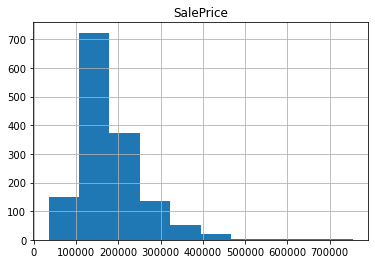

In [21]:
# check distribution of sales price
train_df.hist(column='SalePrice')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12587fc70>]],
      dtype=object)

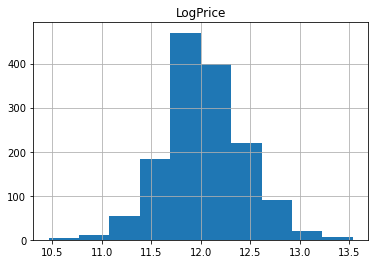

In [22]:
# normalize sale price so that it can be evenly distributed
train_df['LogPrice'] = np.log(train_df.SalePrice)
train_df.hist(column='LogPrice')

In [23]:
# check for more skewed columns
train_df.skew().sort_values(ascending=False).head(30)

RoofMatl_Metal          38.209946
RoofMatl_Membran        38.209946
Electrical_Mix          38.209946
Condition2_PosA         38.209946
Exterior2nd_Other       38.209946
Functional_Sev          38.209946
Utilities_NoSeWa        38.209946
Condition2_RRAn         38.209946
Exterior1st_AsphShn     38.209946
Exterior1st_ImStucc     38.209946
Condition2_RRAe         38.209946
RoofMatl_Roll           38.209946
RoofMatl_ClyTile        38.209946
Heating_Floor           38.209946
Exterior1st_CBlock      38.209946
Exterior2nd_CBlock      38.209946
Electrical_0            38.209946
MiscFeature_TenC        38.209946
Heating_OthW            26.990701
RoofStyle_Shed          26.990701
Exterior1st_Stone       26.990701
MiscFeature_Othr        26.990701
Neighborhood_Blueste    26.990701
Condition2_PosN         26.990701
Exterior1st_BrkComm     26.990701
MiscFeature_Gar2        26.990701
SaleType_Con            26.990701
Condition1_RRNe         26.990701
Condition2_RRNn         26.990701
Condition2_Art

In [24]:
# looking at correlation of numeric features to SalePrice column. 
# this will suggest which columns have a greater relationship with the SalePrice column 
corr = train_df.corr().abs().unstack().sort_values(ascending=False)['LogPrice']
corr = corr.iloc[1:]
corr = pd.DataFrame(corr, columns = ['Correlation'])

corr = corr[corr.Correlation > 0.50]
corr

,Correlation
SalePrice,0.948374
OverallQual,0.817184
GrLivArea,0.700927
GarageCars,0.680625
ExterQual,0.678840
KitchenQual,0.667893
GarageArea,0.650888
BsmtQual,0.615804
TotalBsmtSF,0.612134
1stFlrSF,0.596981


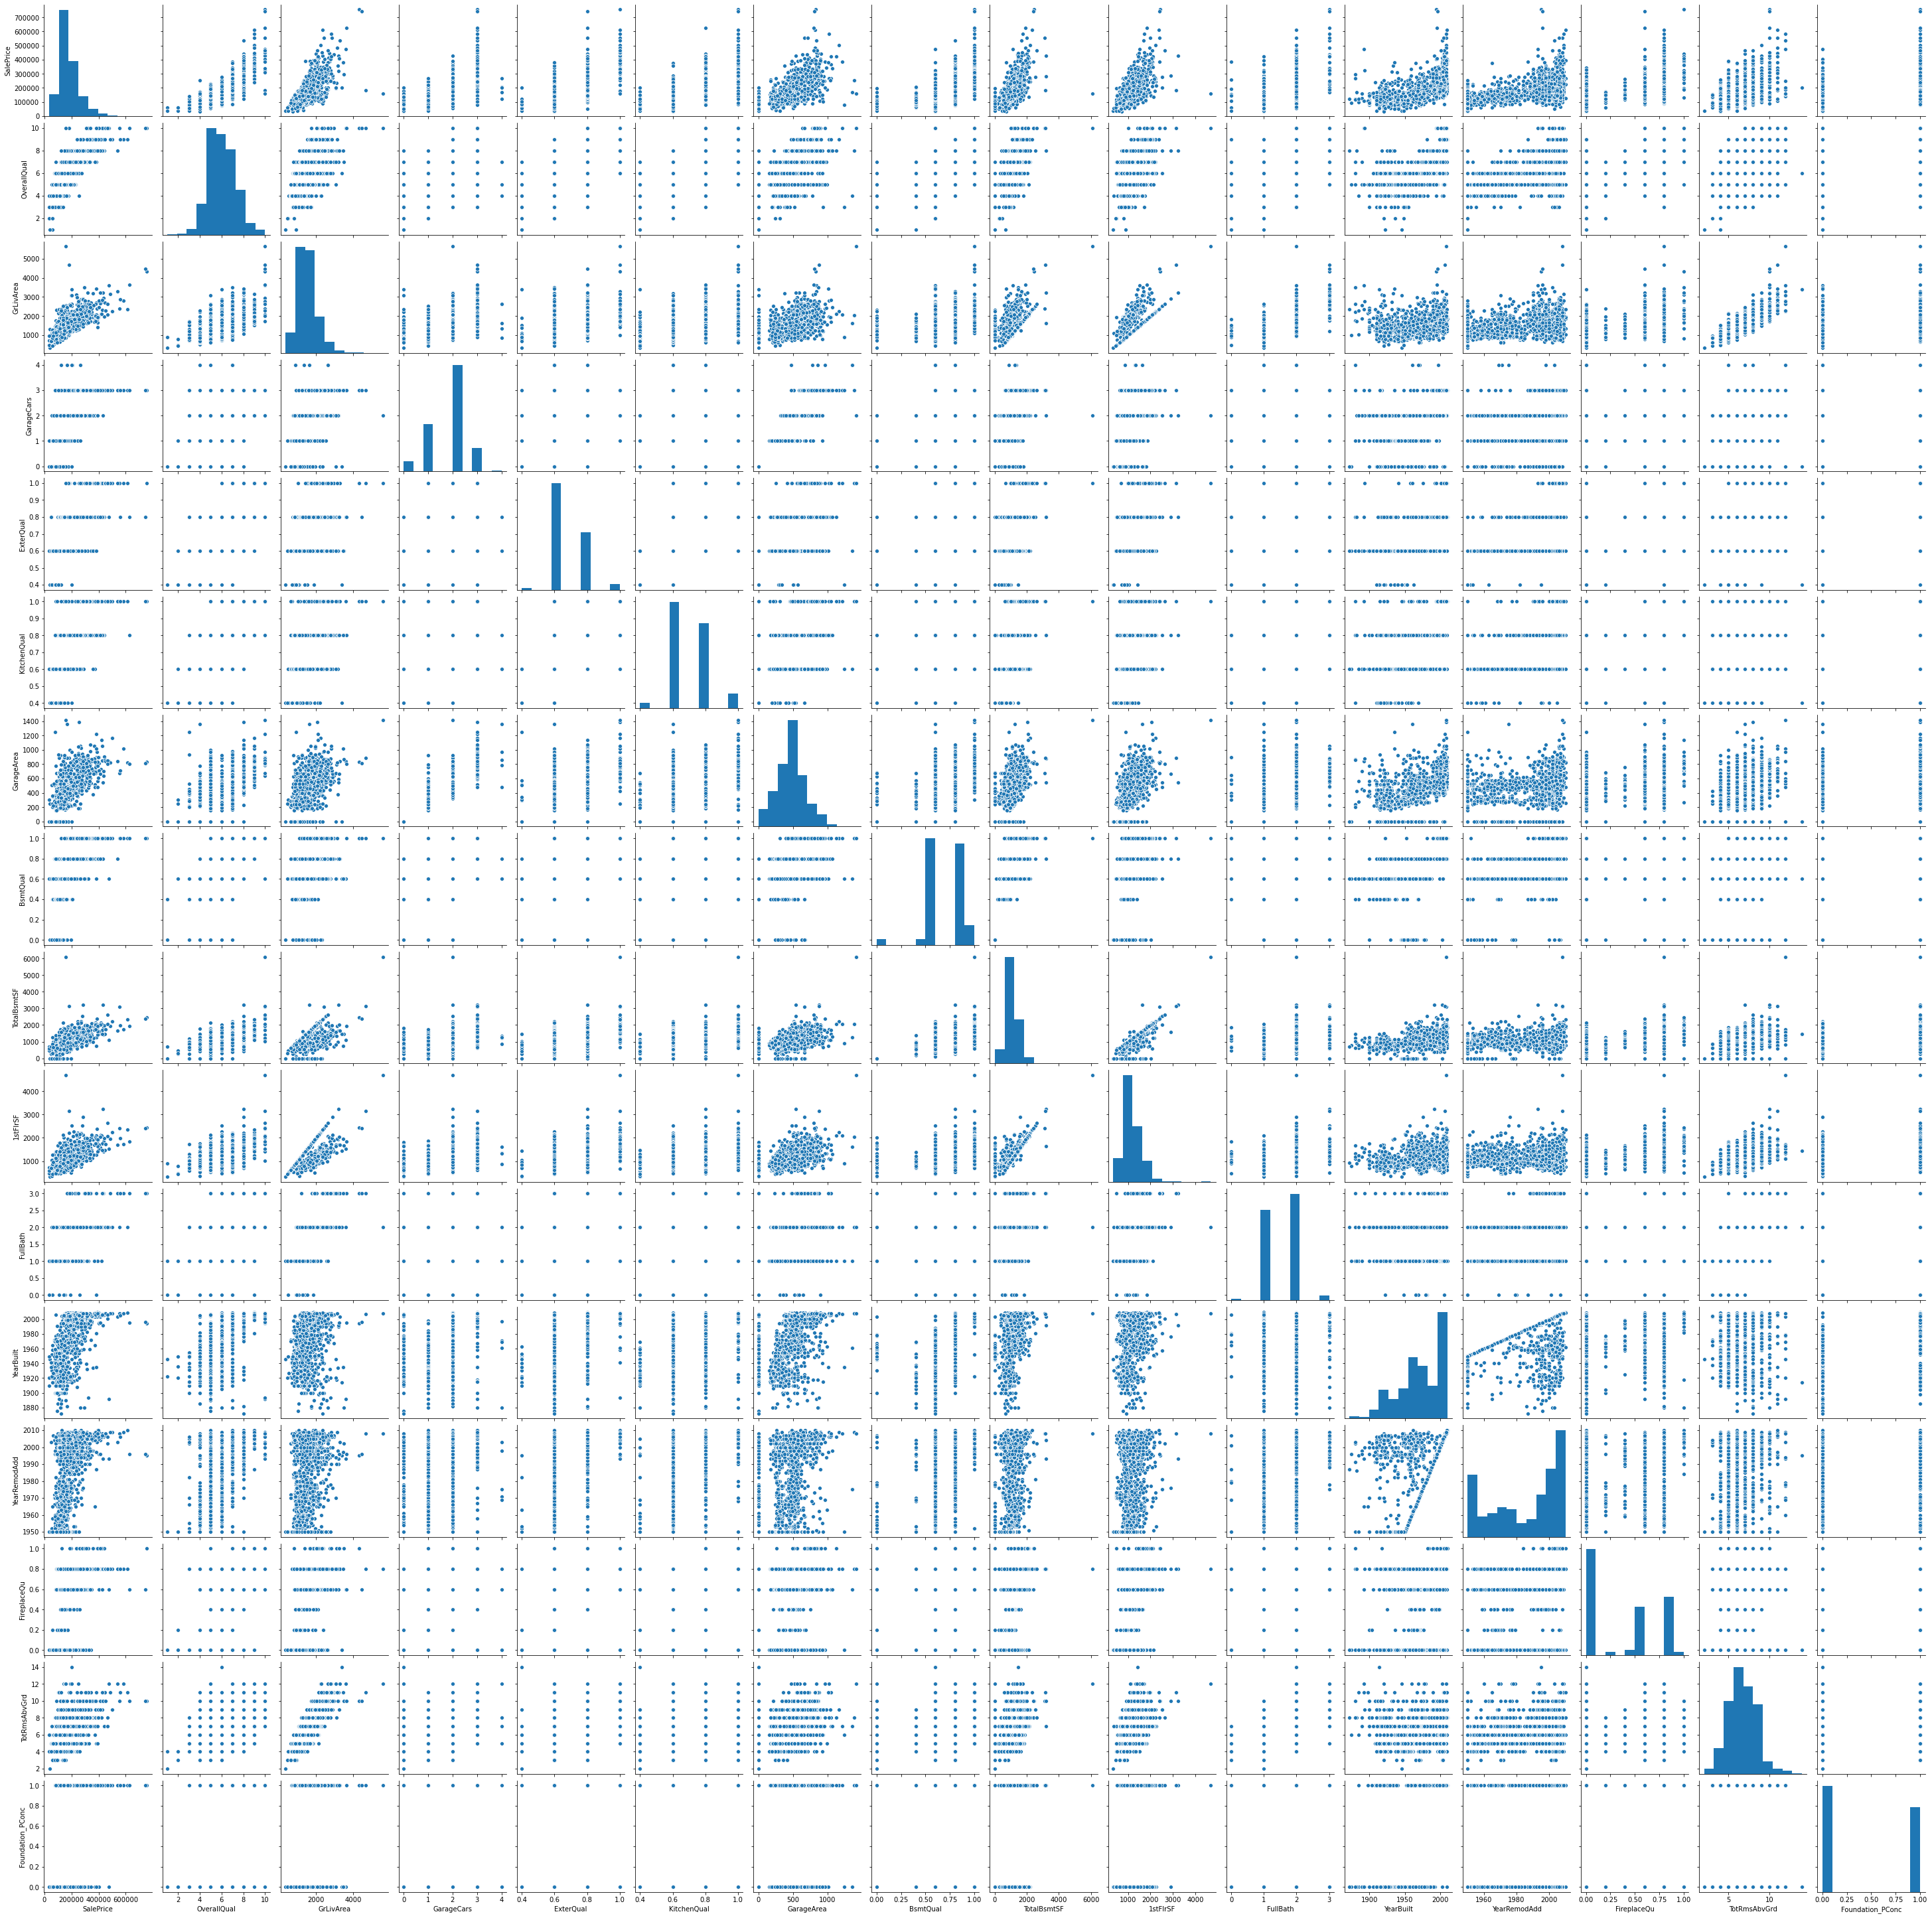

In [25]:
cols = []
for ind in corr.index:
    cols.append(ind)

# create pair plot between columns that have correlation 50% and above
sns.pairplot(train_df[cols])

## Data Visualization (CAN BE DELETED):

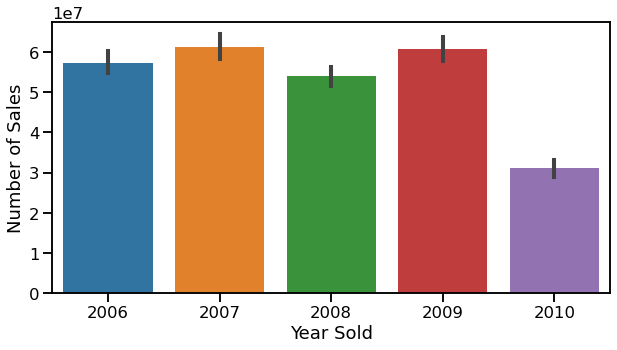

In [26]:
#Count the number of houses sold in a year
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc='count')
#print(year_sold_pivot)

# Plotting the sum of sales per year
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=sum)
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.show()

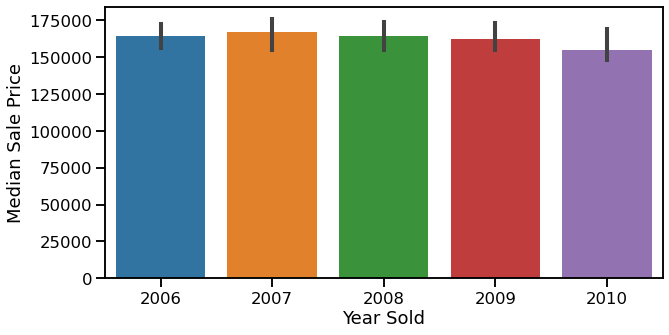

In [27]:
# Plotting the median sale price for each year

#Checking the median price
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc=np.median)
#print(year_sold_pivot)

sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=np.median)
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

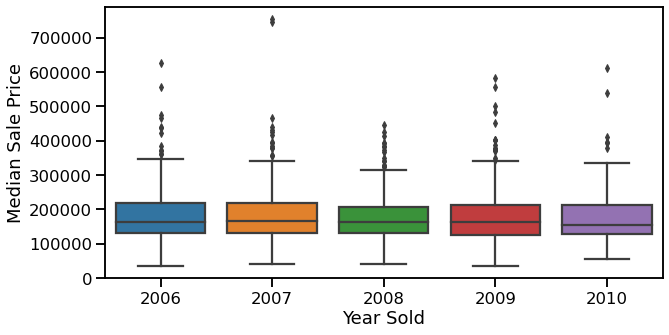

In [28]:
#Displaying the median price for each year using box plot.  
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.boxplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']])
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

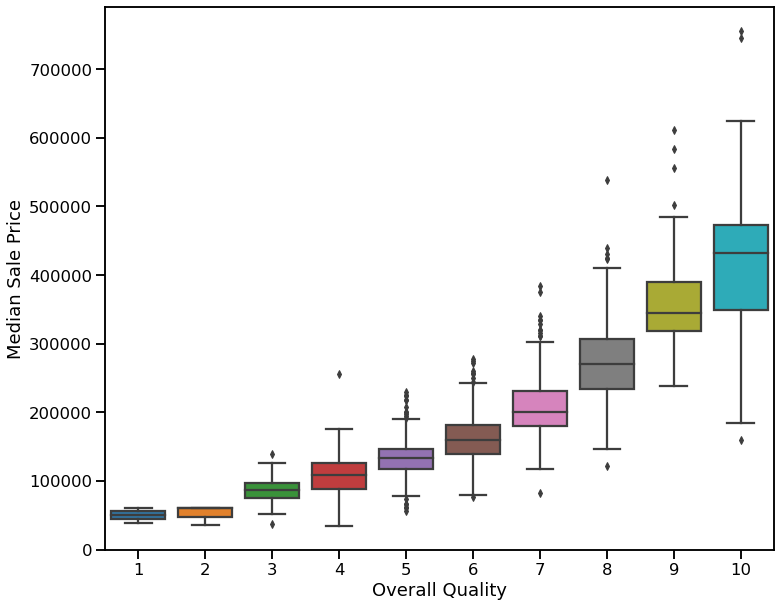

In [29]:
# Displaying the median price based on overall quality of the house using box plot.
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(12,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df[['SalePrice', 'OverallQual']])
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

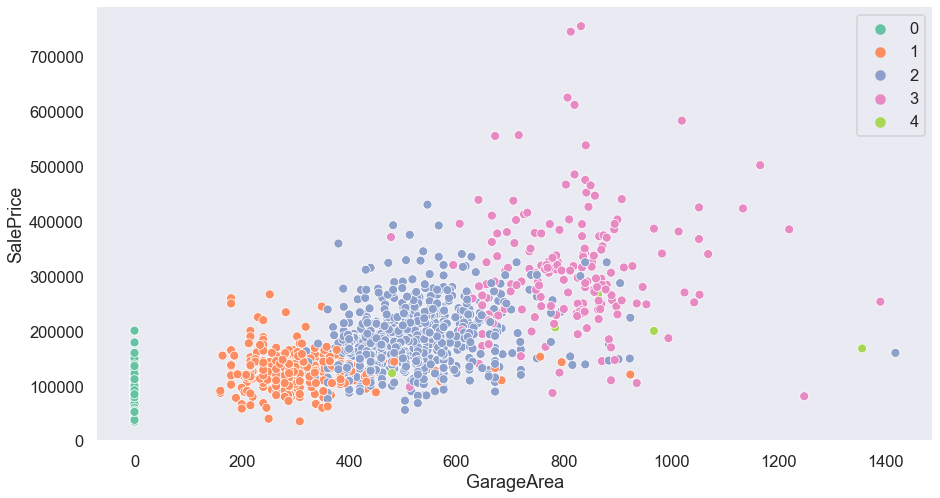

In [1432]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot GarageArea vs sale price of house considering the number of cars that can
# fit in the garage
sns.scatterplot(x='GarageArea', y='SalePrice', hue=train_df.GarageCars.tolist(),
            palette='Set2', data=train_df[['SalePrice', 'GarageArea','GarageCars']])
plt.show()

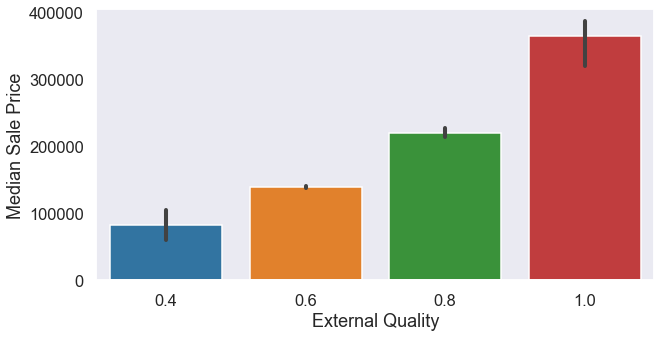

In [1433]:
# Plotting the median sale price based on external quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='ExterQual', y='SalePrice', data=train_df[['SalePrice', 'ExterQual']], estimator=np.median)
plt.xlabel('External Quality')
plt.ylabel('Median Sale Price')
plt.show()

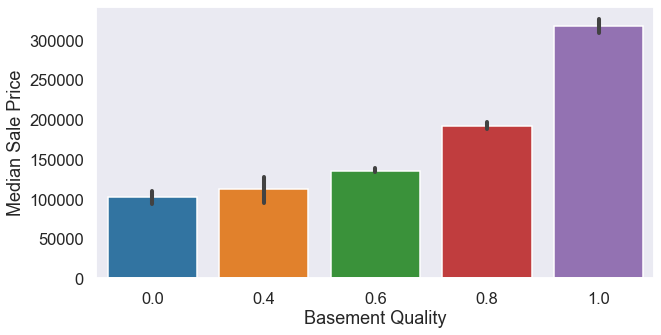

In [1434]:
# Plotting the median sale price based on basement quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='BsmtQual', y='SalePrice', data=train_df[['SalePrice', 'BsmtQual']], estimator=np.median)
plt.xlabel('Basement Quality')
plt.ylabel('Median Sale Price')
plt.show()

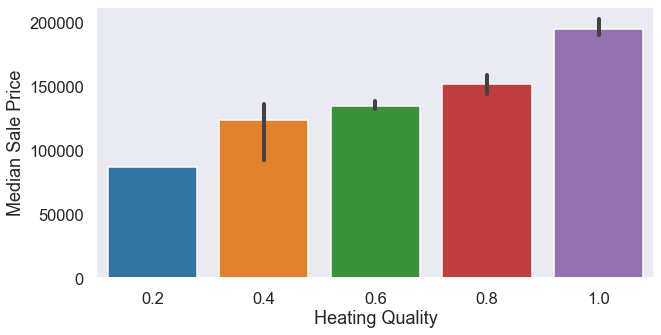

In [1435]:
# Plotting the median sale price based on heating and air conditioning quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='HeatingQC', y='SalePrice', data=train_df[['SalePrice', 'HeatingQC']], estimator=np.median)
plt.xlabel('Heating Quality')
plt.ylabel('Median Sale Price')
plt.show()

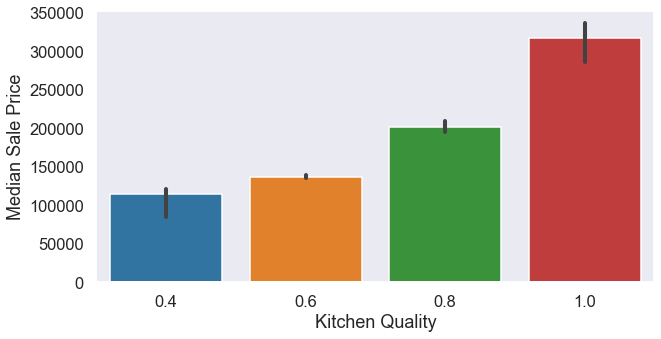

In [1436]:
# Plotting the median sale price based on kitchen quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='KitchenQual', y='SalePrice', data=train_df[['SalePrice', 'KitchenQual']], estimator=np.median)
plt.xlabel('Kitchen Quality')
plt.ylabel('Median Sale Price')
plt.show()

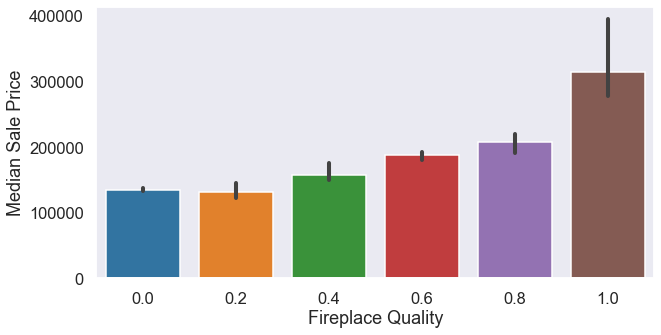

In [1437]:
# Plotting the median sale price based on fireplace quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='FireplaceQu', y='SalePrice', data=train_df[['SalePrice', 'FireplaceQu']], estimator=np.median)
plt.xlabel('Fireplace Quality')
plt.ylabel('Median Sale Price')
plt.show()

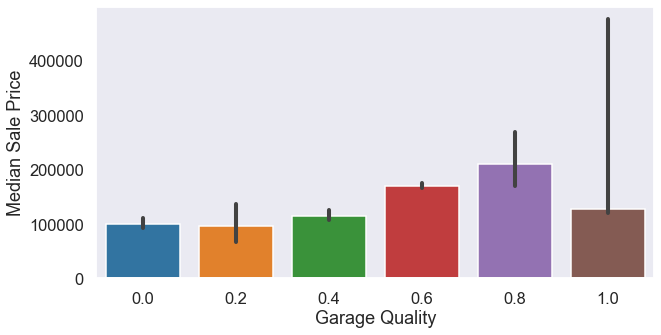

In [1438]:
# Plotting the median sale price based on garage quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='GarageQual', y='SalePrice', data=train_df[['SalePrice', 'GarageQual']], estimator=np.median)
plt.xlabel('Garage Quality')
plt.ylabel('Median Sale Price')
plt.show()

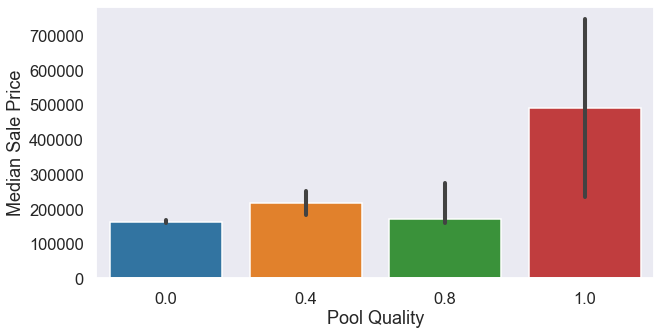

In [1439]:
# Plotting the median sale price based on pool quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='PoolQC', y='SalePrice', data=train_df[['SalePrice', 'PoolQC']], estimator=np.median)
plt.xlabel('Pool Quality')
plt.ylabel('Median Sale Price')
plt.show()

## Feature Engineering:

In [30]:
# sum of quality points.
train_df['SumQuality'] = train_df.ExterQual + train_df.BsmtQual + train_df.HeatingQC + train_df.KitchenQual + train_df.GarageQual + train_df.FireplaceQu + train_df.GarageQual + train_df.PoolQC 
test_df['SumQuality'] = test_df.ExterQual + test_df.BsmtQual + test_df.HeatingQC + test_df.KitchenQual + test_df.GarageQual + test_df.FireplaceQu + test_df.GarageQual + test_df.PoolQC 
              
#print(train_df['SumQuality'])

# sum of quality points, removing less correlated features (< 0.5).
train_df['SumMIQ'] = train_df.ExterQual + train_df.BsmtQual + train_df.KitchenQual + train_df.FireplaceQu + train_df.GarageQual
test_df['SumMIQ'] = test_df.ExterQual + test_df.BsmtQual + test_df.KitchenQual + test_df.FireplaceQu + test_df.GarageQual

In [31]:
# Garage area per car
train_df['GarageAreaPerCar'] = train_df.GarageArea / train_df.GarageCars 
train_df.GarageAreaPerCar.fillna(0, inplace=True) 

test_df['GarageAreaPerCar'] = test_df.GarageArea / test_df.GarageCars 
test_df.GarageAreaPerCar.fillna(0, inplace=True) 

#Age of garage
train_df['GarageAge'] = train_df.YrSold - train_df.GarageYrBlt
test_df['GarageAge'] = test_df.YrSold - test_df.GarageYrBlt

#Age of house
train_df['Age'] = train_df.YrSold - train_df.YearBuilt
test_df['Age'] = test_df.YrSold - test_df.YearBuilt

#Age of house remodelling
train_df['RemodelAge'] = train_df.YrSold - train_df.YearRemodAdd
test_df['RemodelAge'] = test_df.YrSold - test_df.YearRemodAdd

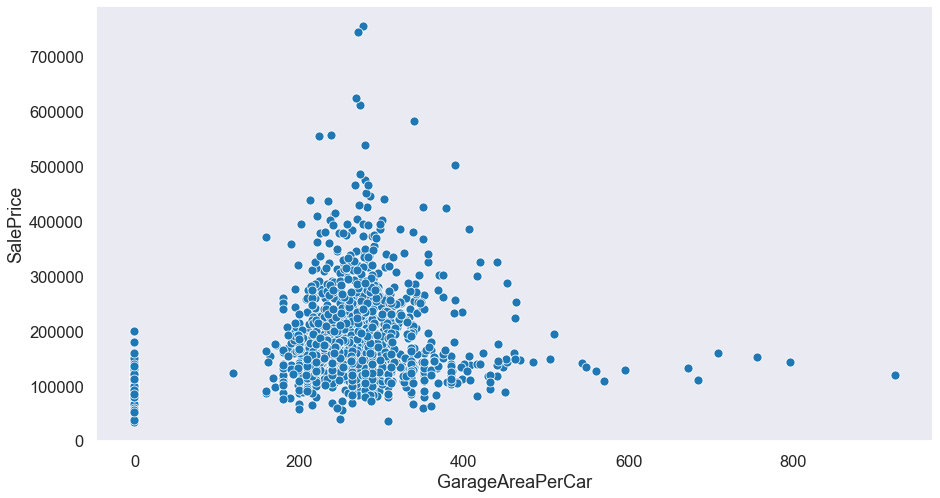

In [32]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot garage area per car vs sale price of house
sns.scatterplot(x='GarageAreaPerCar', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'GarageAreaPerCar']])
plt.show()

In [33]:
# summing developed areas (indoor and outdoor)
train_df['IndoorArea'] = train_df.GrLivArea + train_df.TotalBsmtSF + train_df.GarageArea
test_df['IndoorArea'] = test_df.GrLivArea + test_df.TotalBsmtSF + test_df.GarageArea

train_df['OutdoorArea'] = train_df.WoodDeckSF + train_df.OpenPorchSF + train_df.EnclosedPorch + train_df['3SsnPorch'] + train_df.ScreenPorch + train_df.MasVnrArea + train_df.PoolArea
test_df['OutdoorArea'] = test_df.WoodDeckSF + test_df.OpenPorchSF + test_df.EnclosedPorch + test_df['3SsnPorch'] + test_df.ScreenPorch + test_df.MasVnrArea + test_df.PoolArea

train_df['DevelopedArea'] = train_df.IndoorArea + train_df.OutdoorArea
test_df['DevelopedArea'] = test_df.IndoorArea + test_df.OutdoorArea

#train_df['InsideOutsideRatio'] = train_df.IndoorArea / train_df.OutdoorArea

#train_df['FloorRatio'] = train_df['2ndFlrSF'] / train_df['1stFlrSF']

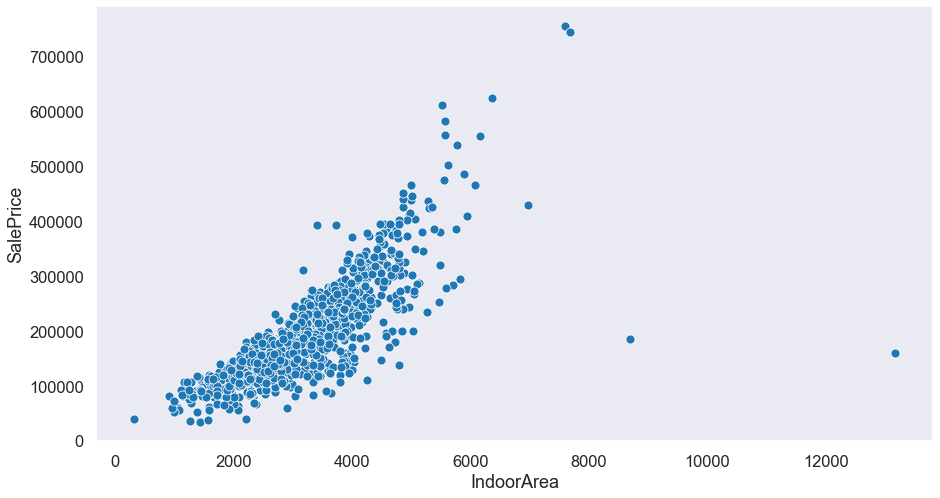

In [34]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total indoor area vs sale price of house
sns.scatterplot(x='IndoorArea', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'IndoorArea']])
plt.show()

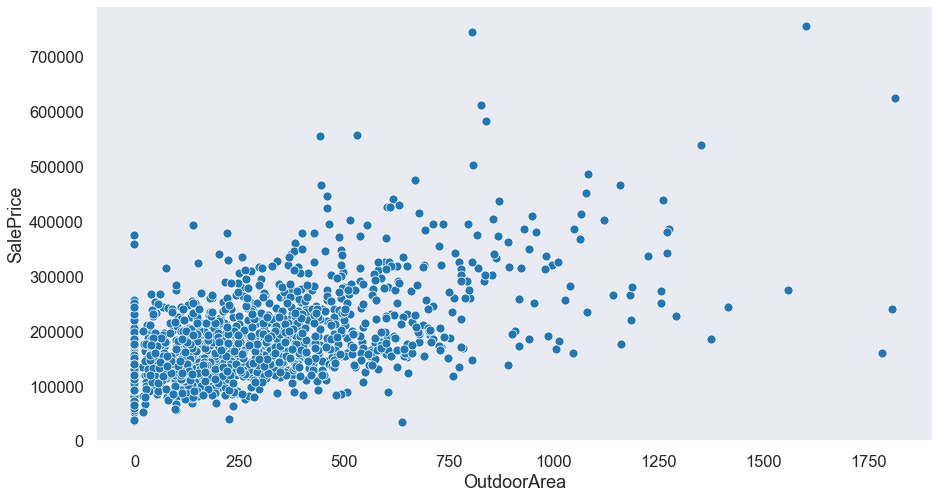

In [35]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total outdoor area vs sale price of house considering the building type
sns.scatterplot(x='OutdoorArea', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'OutdoorArea']])
plt.show()

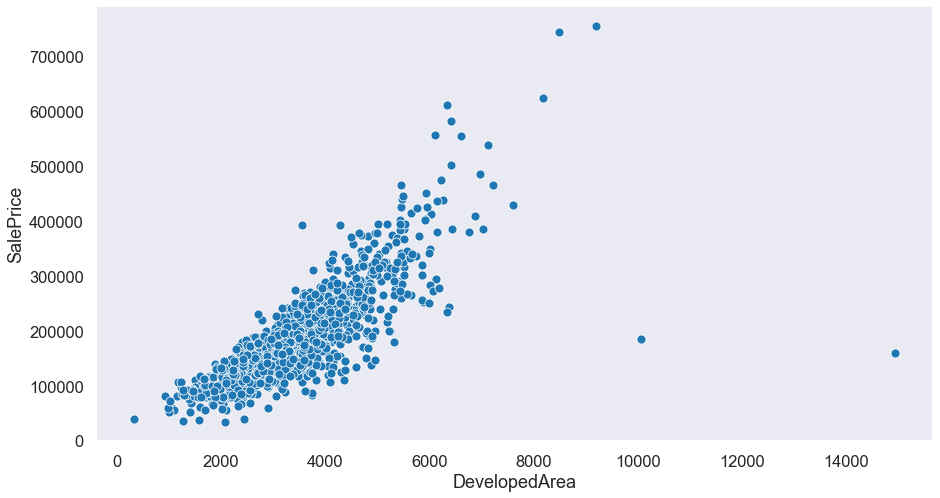

In [36]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total area that has been built out (nothing has been built on it) vs sale price of house
# considering the building type
sns.scatterplot(x='DevelopedArea', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'DevelopedArea']])
plt.show()

In [37]:
train_df['IsNew'] = train_df.Age.map(lambda x: 0 if x > 0 else 1)

train_df['IsRemodelled'] = train_df.RemodelAge.map(lambda x: 0 if x > 0 else 1)

In [38]:
train_df.to_csv('output.csv')

In [40]:
features = list(['SalePrice', 'SumQuality', 'SumMIQ', 'GarageAge', 'GarageAreaPerCar', 'Age', 'RemodelAge',
                 'IndoorArea', 'OutdoorArea',
                 'DevelopedArea', 'IsNew', 'IsRemodelled'])
corr = train_df[features].corr().abs().unstack().sort_values(ascending=False)['SalePrice']
print(corr)

SalePrice           1.000000
DevelopedArea       0.816964
IndoorArea          0.807518
SumMIQ              0.753830
SumQuality          0.740640
OutdoorArea         0.569425
Age                 0.523350
RemodelAge          0.509079
IsRemodelled        0.335975
GarageAge           0.261441
IsNew               0.224807
GarageAreaPerCar    0.158189
dtype: float64


## Logistic Regression:

In [42]:
train_df.reset_index(drop=True, inplace=True)

y = np.log(train_df['SalePrice'])
X = train_df.drop(['SalePrice', 'LogPrice'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [-2.38049221e-04  8.96952250e-05  1.92689932e-06  4.77428757e-02
  3.56132382e-02  1.13743527e-03  6.59730687e-04 -2.38749845e-04
 -7.39233842e-02 -1.30069773e-01  5.73713252e-02  5.31423229e-02
  5.21851311e-03 -1.19575497e-06 -5.17973925e-04 -1.14867188e-05
 -5.39846758e-05 -6.66671393e-05  1.86028574e-01  6.04327410e-02
 -4.81095747e-05 -4.45379862e-05  1.34920849e-04  4.22733398e-05
  3.03412125e-02  9.62159184e-03  2.45623097e-02  3.93417112e-02
  8.50061185e-03 -4.12013691e-02  9.75966342e-03  8.68886124e-03
  2.92401044e-02 -4.60924898e-02  7.11535491e-05 -1.79273570e-02
  6.60729223e-05  2.32694061e-01 -8.41704525e-02  2.51734667e-03
 -2.11734894e-04 -2.62126748e-04 -1.02579284e-04 -7.97582599e-05
 -9.70122286e-06  1.02072337e-03 -7.22339973e-01  2.70434316e-05
  6.16228833e-04  4.77784999e-04 -2.73800968e-01  9.89571592e-02
  5.95266079e-02  7.03685984e-02  4.49486024e-02 -5.65014340e-02
  5.65014340e-02 -2.84892737e-02 -1.02826033e-02  3.87718770e-02
 -1.66783

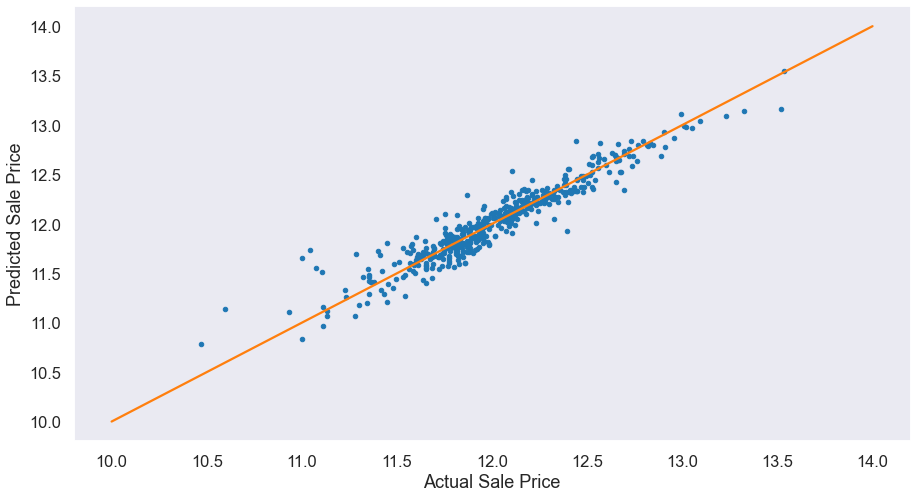

In [43]:
# plot prediction and actual data
y_pred = lr.predict(X_test)
plt.figure(figsize=(15,8))
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(10, 14, 20)
y = x
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot(x, y)
plt.show()

## XGB Regression:

In [92]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 250, seed = 123,
                        subsample=0.60, learning_rate=0.1)

In [93]:
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE 
rmse = np.sqrt(mean_squared_error(y_test, pred)) 

# variance score
var_score = explained_variance_score(y_test, pred)

# MAPE
mape = np.mean(np.abs((y_test - pred) / y_test)) * 100

print("RMSE: %.2f" %(rmse)) 
print("variance score: %.2f" %(var_score))
print("MAPE: %.2f" %(mape) + '%')

RMSE: 0.14
variance score: 0.88
MAPE: 0.75%


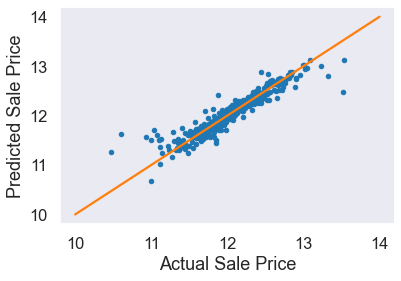

In [94]:
# plot predicted price vs actual price
plt.plot(y_test, pred, '.')

x = np.linspace(10, 14)
y = x
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot(x, y)
plt.show()

In [95]:
out_df = X_test.copy()
out_df['Actual_Target'] = y_test
out_df['Predicted_Target'] = pred
out_df.head(30)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,GarageAge,Age,RemodelAge,IndoorArea,OutdoorArea,DevelopedArea,IsNew,IsRemodelled,Actual_Target,Predicted_Target
892,20,70.0,8414,6,8,1963,2003,0.0,0.6,0.6,...,43.0,43,3,2391,192.0,2583.0,0,0,11.947949,11.870632
1105,60,98.0,12256,8,5,1994,1995,362.0,0.8,0.6,...,16.0,16,15,4797,580.0,5377.0,0,0,12.691580,12.723571
413,30,56.0,8960,5,6,1927,1950,0.0,0.6,0.6,...,83.0,83,60,2396,130.0,2526.0,0,0,11.652687,11.594110
522,50,50.0,5000,6,7,1947,1950,0.0,0.6,0.8,...,56.0,59,56,3088,60.0,3148.0,0,0,11.976659,11.872244
1036,20,89.0,12898,9,5,2007,2008,70.0,0.8,0.6,...,1.0,2,1,4152,298.0,4450.0,0,0,12.661914,12.695249
614,180,21.0,1491,4,6,1972,1972,0.0,0.6,0.6,...,2010.0,38,38,1260,120.0,1380.0,0,0,11.231888,11.309031
218,50,0.0,15660,7,9,1939,2006,312.0,0.8,0.8,...,69.0,69,2,3183,581.0,3764.0,0,0,12.649155,12.365126
1160,160,24.0,2280,6,5,1978,1978,0.0,0.6,0.6,...,32.0,32,32,2751,26.0,2777.0,0,0,11.891362,11.847551
649,180,21.0,1936,4,6,1970,1970,0.0,0.6,0.6,...,2007.0,37,37,1260,0.0,1260.0,0,0,11.344507,11.339711
887,50,59.0,16466,5,7,1955,1955,0.0,0.6,0.8,...,53.0,53,53,2509,386.0,2895.0,0,0,11.816727,11.791333
